In [36]:
import numpy as np
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
import time

In [105]:
pi = 3.141596


n_n = 10
n_t = 500
n_q = 2
min_n_n = 10
max_n_n = 300
increment_n_n = 10
batch_limit = 45 #DO NOT CHANGE
percent_cluster_distance = 84.

delta_t = 1

print_percent = 1.

In [106]:
def lin_func(x,m,c):
    y = [m*val + c for val in x]
    return y

In [107]:
def sin_func(x,l,a):
    y = [a*np.sin(2*pi*val/l) for val in x]
    return y

In [108]:
n_t= int(n_t * delta_t)
n_n_tmp = int((n_n/2))

print(f"n_t = {n_t}")
print(f"n_n_tmp = {n_n_tmp}")

x_dat = [i for i in np.arange(0,n_t,delta_t)]

sin_dat = np.array([sin_func(x_dat,float(n_t)/float(l),n_t) for l in np.arange(1,n_n_tmp+1,1)])
print("Done sin_dat!")
lin_dat = np.array([lin_func(x_dat,m,0.) for m in np.arange(1,n_n_tmp+1,1)])
print("Done lin_dat!")

print(f"np.shape(sin_dat) = {np.shape(sin_dat)}")
print(f"np.shape(lin_dat) = {np.shape(lin_dat)}")
A = np.concatenate((sin_dat,lin_dat),axis=0)
print(f"np.shape(A) = {np.shape(A)}")
Mtmp = [A for ii in range(0,int(n_q/2))]
B = np.concatenate((lin_dat,lin_dat),axis=0)
print(f"np.shape(B) = {np.shape(B)}")
Mtmp = Mtmp + [B for ii in range(0,int(n_q/2))]
M = np.array(Mtmp).reshape(n_n,n_t,n_q)
print(f"np.shape(M) = {np.shape(M)}")
del sin_dat, lin_dat

n_t = 500
n_n_tmp = 5
Done sin_dat!
Done lin_dat!
np.shape(sin_dat) = (5, 500)
np.shape(lin_dat) = (5, 500)
np.shape(A) = (10, 500)
np.shape(B) = (10, 500)
np.shape(M) = (10, 500, 2)


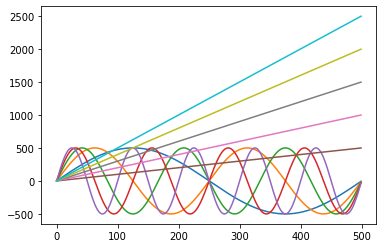

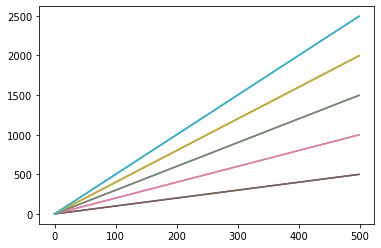

In [109]:
for quantity in M.reshape(n_q,n_n,n_t):
    fig = plt.figure()
    for tseries in quantity:
        plt.plot(x_dat,tseries)

In [110]:
X = to_time_series_dataset(M)

In [111]:
np.shape(X)

(10, 500, 2)

In [112]:
X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X)

In [117]:
start = time.time()
km_dba = TimeSeriesKMeans(n_clusters=2,metric="dtw",n_jobs=-2,verbose=0,random_state=0).fit_predict(X_scaled)
end = time.time()
time_elapsed = end - start
print(f"Time for Run {time_elapsed}")

Time for Run 7.990049362182617


In [118]:
km_dba

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])